<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/Unit2_lab_quiz_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [7]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [8]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]



In [9]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):

  # Create bootstrap samples from given dataset
  bootstrapping = np.random.choice(x, replace= True, size= [n_bootstraps, sample_size])  

  meanBootstapSamples = []

  # Create an array of mean of all bootstrap samples
  for singleSample in bootstrapping:
    singleSampleMean = singleSample.mean()
    meanBootstapSamples.append(singleSampleMean)

  meanBootstapSamplesArray = np.array(meanBootstapSamples)  

  # Mean of array of all means of bootstrap samples
  data_mean = meanBootstapSamplesArray.mean() 
  
  # Lower and upper mean values in mean of bootstrap arrays
  lower, upper = np.percentile(meanBootstapSamplesArray, [2.5, 97.5])
  return data_mean, lower, upper


bootstrap_mean(data, data.shape[0], 10)

(9.007142857142856, 7.516071428571428, 11.292857142857144)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

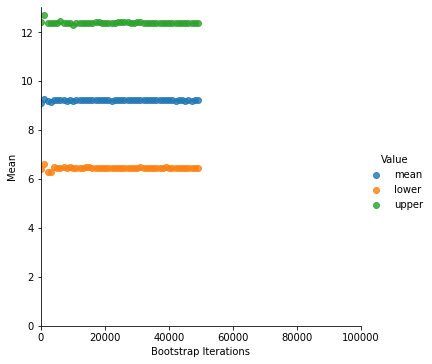

In [10]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [11]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  # <---INSERT YOUR CODE HERE--->

 # Create bootstrap samples from given dataset
  bootstrapping = np.random.choice(sample, replace= True, size= [n_bootstraps, sample_size])  

  meanBootstapSamples = []

  # Create an array of mean of all bootstrap samples
  for singleSample in bootstrapping:
    singleSampleMean = singleSample.mean()
    meanBootstapSamples.append(singleSampleMean)
    
  meanBootstapSamplesArray = np.array(meanBootstapSamples)  

  # Mean of array of all means of bootstrap samples
  data_mean = meanBootstapSamplesArray.mean() 
  
  # Lower and upper mean values in mean of bootstrap arrays
  lower, upper = np.percentile(meanBootstapSamplesArray, [(100-ci)/2, ci + (100-ci)/2])

  return data_mean, lower, upper

# bootstrap_mean_ci(data, data.shape[0], 10, 80)
bootstrap_mean_ci(data, data.shape[0], 10, 80)
	

(9.028571428571428, 7.571428571428572, 10.564285714285713)

In [21]:
def bootstrap_standardDeviation_ci(sample, sample_size, n_bootstraps, ci):
  # <---INSERT YOUR CODE HERE--->

 # Create bootstrap samples from given dataset
  bootstrapping = np.random.choice(sample, replace= True, size= [n_bootstraps, sample_size])  

  meanBootstapSamples = []

  # Create an array of mean of all bootstrap samples
  for singleSample in bootstrapping:
    # singleSampleMean = singleSample.mean()
    singleSampleStd = np.std(singleSample)
    meanBootstapSamples.append(singleSampleStd)
    
  meanBootstapSamplesArray = np.array(meanBootstapSamples)  

  # Mean of array of all means of bootstrap samples
  # data_mean = meanBootstapSamplesArray.mean() 
  data_std = np.std(meanBootstapSamplesArray)
  
  # Lower and upper mean values in mean of bootstrap arrays
  lower, upper = np.percentile(meanBootstapSamplesArray, [(100-ci)/2, ci + (100-ci)/2])

  return data_std, lower, upper

# bootstrap_mean_ci(data, data.shape[0], 10, 80)
bootstrap_standardDeviation_ci(data, data.shape[0], 10, 80)
	

(1.0360429945663294, 4.233667823075378, 6.325568426272781)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

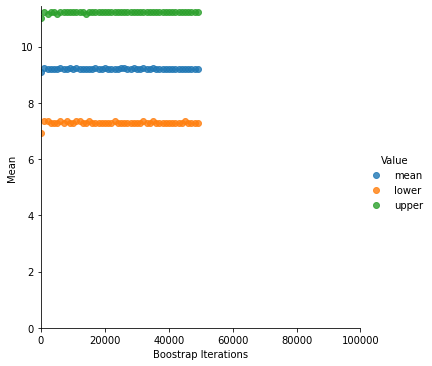

In [12]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


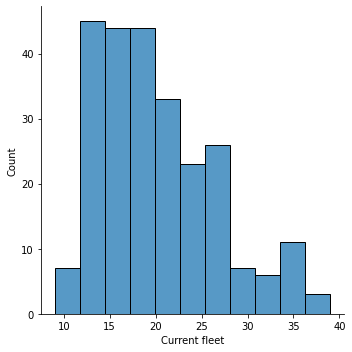

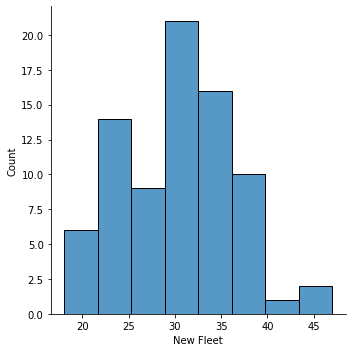

In [13]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->

# Load data from github vehicle dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

# current fleet dataset
currentFleet = df.values.T[0]

# new fleet dataset
newFleet = df.values.T[1]

# Removing null values from new fleet dataset
newFleet= newFleet[np.logical_not(np.isnan(newFleet))]

# Plotting Current fleet using seaborn histogram
sns.displot(data=df, x='Current fleet')

# sns.scatterplot(data=df, col='Current fleet')

# Plotting new fleet using seaborn histogram
sns.displot(data=df, x='New Fleet')
# sns.scatterplot(data=df, x='New Fleet')

# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [38]:
# <---INSERT YOUR CODE HERE--->

# from mlxtend.evaluate import permutation_test

# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print('dem_share_PA : ', len(dem_share_PA))
print('dem_share_OH: ', len(dem_share_OH))


# Mean of current fleet samples
currentMean = np.mean(currentFleet)

# Mean of new fleet samples
newMean = np.mean(newFleet)

# Observed difference in mean
tObserved = newMean - currentMean

# 85% CI of the mean of the current fleet
# currentSet = bootstrap_mean_ci(currentFleet, currentFleet.shape[0], 10, 95)

#Question: The 85% confidence interval for the mean of the old fleet in the vehicles dataset 
# currentSet = bootstrap_mean_ci(currentFleet, currentFleet.shape[0], 10000, 85)

# Question: The 95% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is
# currentSet = bootstrap_standardDeviation_ci(currentFleet, currentFleet.shape[0], 10000, 95)


# Question: The 73% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations
# currentSet = bootstrap_standardDeviation_ci(currentFleet, currentFleet.shape[0], 10000, 73)
# print('Old Set: ', currentSet)

#Question: The 90% confidence intervals for the means of the votes using 25000 bootstraps are
# votes = np.concatenate((dem_share_PA,dem_share_OH))
# print('votes', len(votes))
# print('votes', votes)

currentSet = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000, 90)
print('dem_share_OH: ', currentSet)

dem_share_PA_mean_ci = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000, 90)
print('dem_share_PA: ', dem_share_PA_mean_ci)

# Construct the 80% CI of the mean of the new fleet.
# newSet = bootstrap_mean_ci(newFleet, newFleet.shape[0], 10, 95)

# Question -The 80% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations 
newSet = bootstrap_mean_ci(newFleet, newFleet.shape[0], 10000, 80)
print('newSet: ', newSet)

# Difference in mean of 95% CI
differenceConfInt = newSet[0] - currentSet[0]

# Permutation test 
concate = np.concatenate((currentFleet,newFleet))

numberOfTimes = 0
n_permutations = 20000
for i in range(n_permutations):
  # Performing permutation
  perm = np.random.permutation(concate)

  # Split the data into the same array length current fleet
  pCurrentFleet = perm[:len(currentFleet)]
  # Split the data into the same array length new fleet
  pNewFleet = perm[-len(newFleet):]

  # Mean value of current array
  pCurrentFleetMean = pCurrentFleet.mean()

  # Mean value of new array
  pNewFleetMean = pNewFleet.mean()

  # Difference in the mean
  tperm = pNewFleetMean - pCurrentFleetMean

  if tperm>tObserved:
    numberOfTimes += 1

pValue = (numberOfTimes)/(n_permutations)
print('pValue : ', pValue)

dem_share_PA :  67
dem_share_OH:  88
dem_share_OH:  (44.303924663636366, 42.57134659090909, 46.02013068181819)
dem_share_PA:  (45.48269770149254, 43.56446268656716, 47.44285820895523)
newSet:  (30.475787341772154, 29.60759493670886, 31.341772151898734)
pValue :  0.0


In [42]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    # Calculating the mean of the two arrays
    # sample1Mean = sample1.mean()
    # sample2Mean = sample2.mean()
    sample1Mean = np.mean(sample1)
    sample2Mean = np.mean(sample2)

    # Observed difference in mean
    tObservation = sample2Mean - sample1Mean

    concate = np.concatenate((sample1,sample2))

    numberOfTimes = 0

    for i in range(n_permutations):
      perm = np.random.permutation(concate)

      pSample1 = perm[:len(sample1)]
      pSample2 = perm[-len(sample2):]

      pSample1Mean = pSample1.mean()
      pSample2Mean = pSample2.mean()

      tperm = pSample2Mean - pSample1Mean
      if (np.float64(tperm) > np.float64(tObservation)):        
        numberOfTimes = numberOfTimes + 1

    pvalue = numberOfTimes/n_permutations

    return pvalue

# Testing scenario's    
a = np.array([1, 2, 3, 4, 5, 7])
b = np.array([1, 2, 3, 4, 5, 9])
# permut_test(a, b, 20000)
# permut_test(currentFleet, newFleet, 20000)
# permut_test(currentFleet, newFleet, 30000)

# Question - The p-value from a permutation test with 20000 permutations is
permut_test(dem_share_PA, dem_share_OH, 30000)

0.7638333333333334

In [41]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print('dem_share_PA : ', len(dem_share_PA))
print('dem_share_OH: ', len(dem_share_OH))

dem_share_PA :  67
dem_share_OH:  88
